<a href="https://colab.research.google.com/github/ranaateff/OSC_task/blob/main/DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Import Data
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
from functools import reduce
from itertools import combinations

!pip install openpyxl

In [38]:
file_path = '/content/Horizontal_Format.xlsx'
Data=pd.read_excel("/content/Horizontal_Format.xlsx")
data = [set(str(row[1]).split(',')) for row in Data.itertuples(index=False)]
items = set(item for transaction in data for item in transaction)

In [39]:
# print(data)

In [40]:
#Variables
min_support = 3
min_conf = 0.8

In [41]:
# Generate combinations
def generate_combinations(items, length):
    if length == 1:
        return [[item] for item in items]
    combinations = []
    for i in range(len(items)):
        first_item = items[i]
        remaining_combinations = generate_combinations(items[i + 1:], length - 1)
        for combination in remaining_combinations:
            combinations.append([first_item] + combination)
    return combinations


# Calculate support
def calculate_support(data, itemset):
    support_count = 0
    for transaction in data:
        all_items_present = True
        for item in itemset:
            if item not in transaction:
                all_items_present = False
                break
        if all_items_present:
            support_count += 1
    return support_count

# Generate frequent itemsets
def generate_frequent_itemsets(data, items, min_support, length):
    frequent_itemsets = {}
    combinations = generate_combinations(list(items), length)
    for i in combinations:
        support = calculate_support(data, i)
        if support >= min_support:
            frequent_itemsets[frozenset(i)] = support
    return frequent_itemsets

In [42]:
# Generate frequent itemsets for all lengths
def generate_frequent_itemsets_for_lengths(data, items, min_support):
    all_frequent_itemsets = {}
    for all_length in range(1, len(items) + 1):
        frequent_itemsets = generate_frequent_itemsets(data, items, min_support, all_length)
        all_frequent_itemsets.update(frequent_itemsets)
    return all_frequent_itemsets

In [43]:
# Display frequent itemsets and their support counts
def display_frequent_itemsets(frequent_itemsets):
    print("\nFrequent Itemsets")
    current_level = None  # Tracking variable

    for itemset, support in frequent_itemsets.items():
        level = len(itemset)  # Level of itemset

        if level != current_level:
            print(f"\nLevel {level}:")
            current_level = level

        print(f"Itemset: {set(itemset)}, Support: {support}")

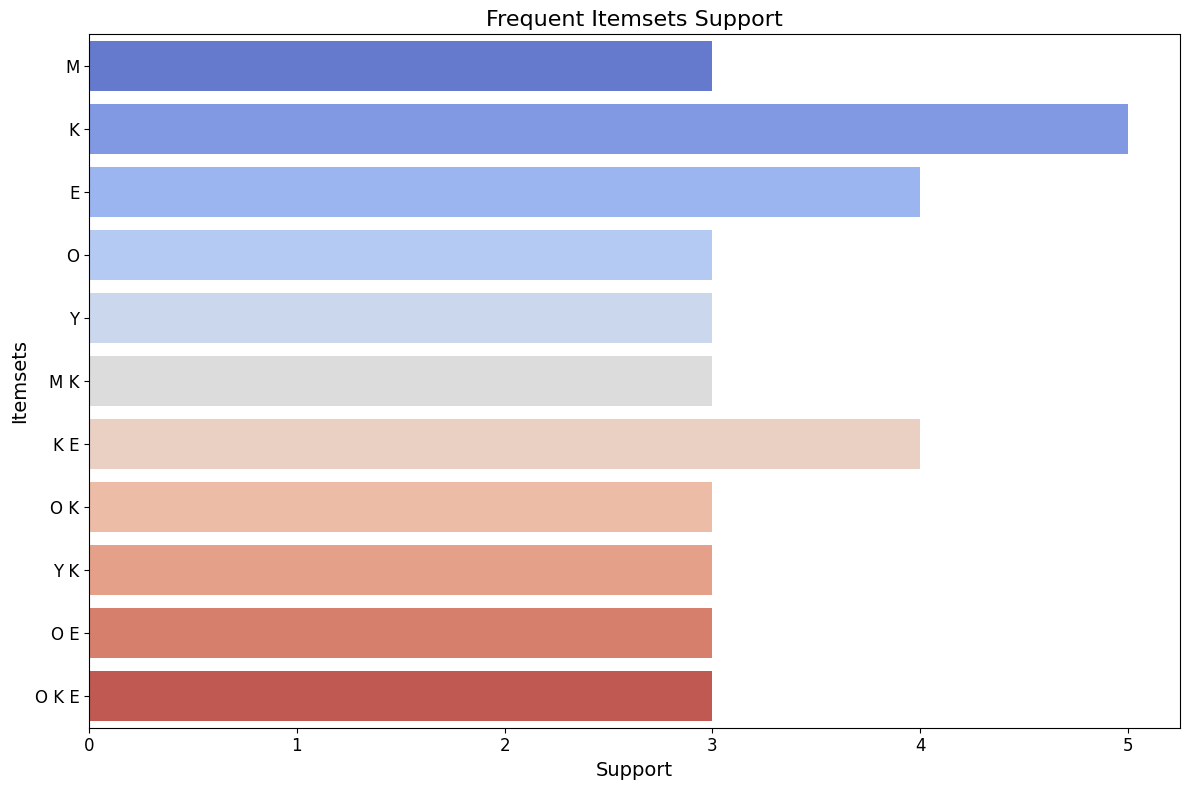

In [44]:
# Generate frequent itemsets (using your data, items, and min_support)
frequent_itemsets = generate_frequent_itemsets_for_lengths(data, items, min_support)
# b5lehom list of dictionary
frequent_itemsets_list = [{'Itemset': ' '.join(map(str, itemset)), 'Support': support}
                          for itemset, support in frequent_itemsets.items()]

# Convert the list to a DataFrame using pandas
frequent_itemsets_df = pd.DataFrame(frequent_itemsets_list)

# Sort the data by support to make it easier to read
# frequent_itemsets_df = frequent_itemsets_df.sort_values(by='Support', ascending=False) دى اختيارى ع حسب احنا حابيين نعرضهم ازاى

plt.figure(figsize=(12, 8))
sns.barplot(data=frequent_itemsets_df, x='Support', y='Itemset', palette='coolwarm', hue='Itemset', dodge=False)

plt.title('Frequent Itemsets Support', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Itemsets', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


In [45]:
def generate_association_rules(frequent_itemsets):
    rules_list = []
    for itemset in frequent_itemsets.keys():
        if len(itemset) > 1:  # Only consider itemsets with more than one item
            for item in itemset:
                left_hand_side = itemset - frozenset([item])  # Left-hand side (A)
                right_hand_side = frozenset([item])  # Right-hand side (B)

                if left_hand_side:  # Ensure left_hand_side is not empty
                    # Calculate support and confidence
                    support_left_hand_side = frequent_itemsets.get(left_hand_side, 0)
                    support_union = frequent_itemsets[itemset]
                    confidence = support_union / support_left_hand_side if support_left_hand_side > 0 else 0

                    rules_list.append((left_hand_side, right_hand_side, confidence))
    return rules_list

# b generate el association rules
association_rules = generate_association_rules(frequent_itemsets)

# Display the rules
print("\nAssociation Rules:")
for left_hand_side, right_hand_side, confidence in association_rules:
    print(f"Rule: {set(left_hand_side)} -> {set(right_hand_side)}, Confidence: {confidence:.2f} ")



Association Rules:
Rule: {'K'} -> {'M'}, Confidence: 0.60 
Rule: {'M'} -> {'K'}, Confidence: 1.00 
Rule: {'E'} -> {'K'}, Confidence: 1.00 
Rule: {'K'} -> {'E'}, Confidence: 0.80 
Rule: {'K'} -> {'O'}, Confidence: 0.60 
Rule: {'O'} -> {'K'}, Confidence: 1.00 
Rule: {'K'} -> {'Y'}, Confidence: 0.60 
Rule: {'Y'} -> {'K'}, Confidence: 1.00 
Rule: {'E'} -> {'O'}, Confidence: 0.75 
Rule: {'O'} -> {'E'}, Confidence: 1.00 
Rule: {'K', 'E'} -> {'O'}, Confidence: 0.75 
Rule: {'O', 'E'} -> {'K'}, Confidence: 1.00 
Rule: {'O', 'K'} -> {'E'}, Confidence: 1.00 


In [46]:
theRules =generate_association_rules(frequent_itemsets)
def extract_strong_rules(theRules,min_conf):
  strong_rules_list=[]
  for left_hand_side, right_hand_side, confidence in theRules:  #b loop 3la list rules bshof men el conf bta3o akbr mn min conf
    if confidence >= min_conf:
     strong_rules_list.append((left_hand_side, right_hand_side, confidence))

  return strong_rules_list


strongRules =extract_strong_rules(theRules,min_conf)
# Display the rules
print("\nStrong Rules:")
for left_hand_side, right_hand_side, confidence in strongRules:
    print(f"Rule: {set(left_hand_side)} -> {set(right_hand_side)}, Confidence: {confidence:.2f}")


Strong Rules:
Rule: {'M'} -> {'K'}, Confidence: 1.00
Rule: {'E'} -> {'K'}, Confidence: 1.00
Rule: {'K'} -> {'E'}, Confidence: 0.80
Rule: {'O'} -> {'K'}, Confidence: 1.00
Rule: {'Y'} -> {'K'}, Confidence: 1.00
Rule: {'O'} -> {'E'}, Confidence: 1.00
Rule: {'O', 'E'} -> {'K'}, Confidence: 1.00
Rule: {'O', 'K'} -> {'E'}, Confidence: 1.00


In [47]:
# Function to Calculate the dependencies between the items
def calculate_lift(rules,frequent_itemsets):
    lift_rules= []
    for left_hand_side, right_hand_side, confidence in rules:
        support_antecedent = frequent_itemsets.get(left_hand_side, 0)
        support_consequent = frequent_itemsets.get(right_hand_side, 0)
        support_union = frequent_itemsets.get(left_hand_side | right_hand_side, 0) if (support_antecedent * support_consequent) > 0 else 0
        #dividing the support count by number of transactions to get the probability , where lift= p(A ∪ B) / p(A) * p(B)
        lift=support_union/len(data) / ((support_antecedent/len(data)) * (support_consequent)/len(data))
        lift_rules.append((left_hand_side, right_hand_side, lift))
    return lift_rules

#generate every association rule with its lift
association_rules_with_lift = calculate_lift(association_rules, frequent_itemsets)

print("\nAssociation Rules with Lift:")
for left_hand_side, right_hand_side, lift in association_rules_with_lift:
    print(f"Rule: {set(left_hand_side)} -> {set(right_hand_side)},  Lift: {lift:.2f}")


Association Rules with Lift:
Rule: {'K'} -> {'M'},  Lift: 1.00
Rule: {'M'} -> {'K'},  Lift: 1.00
Rule: {'E'} -> {'K'},  Lift: 1.00
Rule: {'K'} -> {'E'},  Lift: 1.00
Rule: {'K'} -> {'O'},  Lift: 1.00
Rule: {'O'} -> {'K'},  Lift: 1.00
Rule: {'K'} -> {'Y'},  Lift: 1.00
Rule: {'Y'} -> {'K'},  Lift: 1.00
Rule: {'E'} -> {'O'},  Lift: 1.25
Rule: {'O'} -> {'E'},  Lift: 1.25
Rule: {'K', 'E'} -> {'O'},  Lift: 1.25
Rule: {'O', 'E'} -> {'K'},  Lift: 1.00
Rule: {'O', 'K'} -> {'E'},  Lift: 1.25


In [49]:
def run_algorithm_with_different_support_confidence(data, items, support_values, confidence_values):
    for min_support , min_conf in zip(support_values,confidence_values):
            print(f"\nRunning algorithm with min_support = {min_support} and min_confidence = {min_conf}")

            # Generate frequent itemsets ll support da
            frequent_itemsets = generate_frequent_itemsets_for_lengths(data, items, min_support)
            display_frequent_itemsets(frequent_itemsets)
            print("--------------------------------------------------")

#items = set(item for transaction in data for item in transaction)

# Define different support and confidence values
support_values = [4, 5,3]
confidence_values = [0.7, 0.9,0.8]
run_algorithm_with_different_support_confidence(data, items, support_values, confidence_values)


Running algorithm with min_support = 4 and min_confidence = 0.7

Frequent Itemsets

Level 1:
Itemset: {'K'}, Support: 5
Itemset: {'E'}, Support: 4

Level 2:
Itemset: {'K', 'E'}, Support: 4
--------------------------------------------------

Running algorithm with min_support = 5 and min_confidence = 0.9

Frequent Itemsets

Level 1:
Itemset: {'K'}, Support: 5
--------------------------------------------------

Running algorithm with min_support = 3 and min_confidence = 0.8

Frequent Itemsets

Level 1:
Itemset: {'M'}, Support: 3
Itemset: {'K'}, Support: 5
Itemset: {'E'}, Support: 4
Itemset: {'O'}, Support: 3
Itemset: {'Y'}, Support: 3

Level 2:
Itemset: {'M', 'K'}, Support: 3
Itemset: {'K', 'E'}, Support: 4
Itemset: {'O', 'K'}, Support: 3
Itemset: {'Y', 'K'}, Support: 3
Itemset: {'O', 'E'}, Support: 3

Level 3:
Itemset: {'O', 'K', 'E'}, Support: 3
--------------------------------------------------
